In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [3]:
# load the experiment data

df = pd.read_csv('Experiment_Results/Exp_result_consolidated.csv')
df.head()

,Model,Graph,Feature,Best Val Epoch,Train_Accuracy,Best_Val_Accuracy,Test_Accuracy,Test_F1
0,GAT,Arxiv,E5 Embedding,31,0.605865,0.550589,0.142810,0.097471
1,GAT,Arxiv,Graph Align Embedding,85,0.362444,0.208799,0.082999,0.021572
2,GAT,Arxiv,Original,31,0.583257,0.585624,0.504825,0.257379
3,GAT,MAG,E5 Embedding,57,0.354249,0.380113,0.374564,0.051038
4,GAT,MAG,Graph Align Embedding,63,0.332275,0.358106,0.338972,0.039555


/tmp/ipykernel_18924/2555164710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model_Architecture', y='Test_Accuracy', palette='viridis')


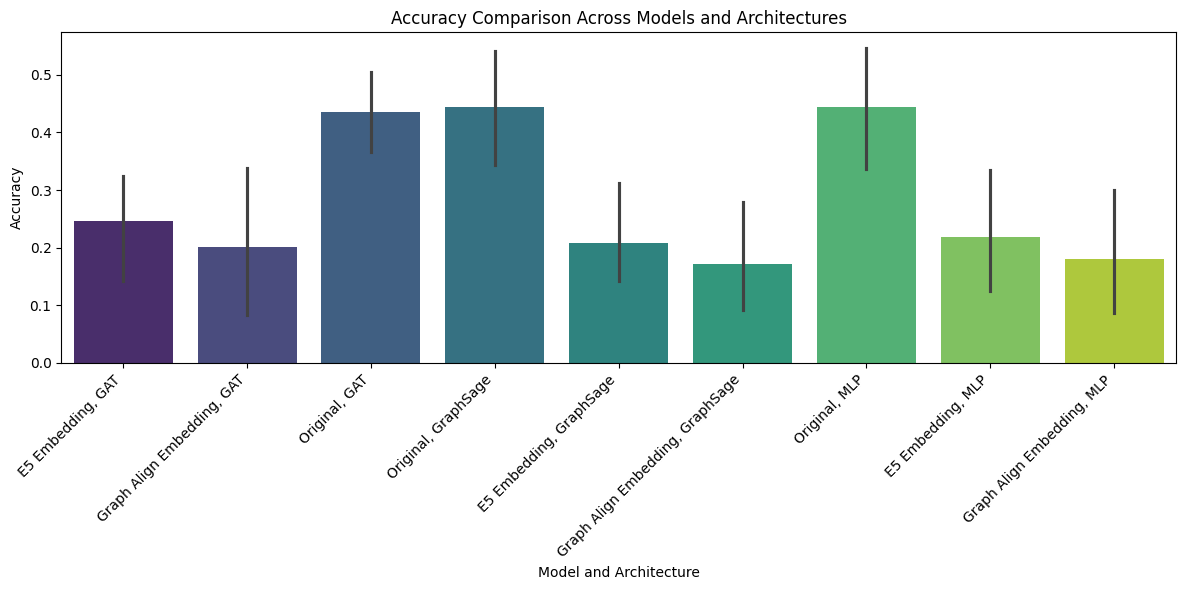

In [ ]:
# Create a new column combining 'Embedding Model' and 'Network Architecture'
df['Model_Architecture'] = df['Feature'] + ', ' + df['Model']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Model_Architecture', y='Test_Accuracy', palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Accuracy Comparison Across Models and Architectures')
plt.xlabel('Model and Architecture')
plt.ylabel('Accuracy')
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_18924/3917136900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model_Architecture', y='Test_F1', palette='viridis')


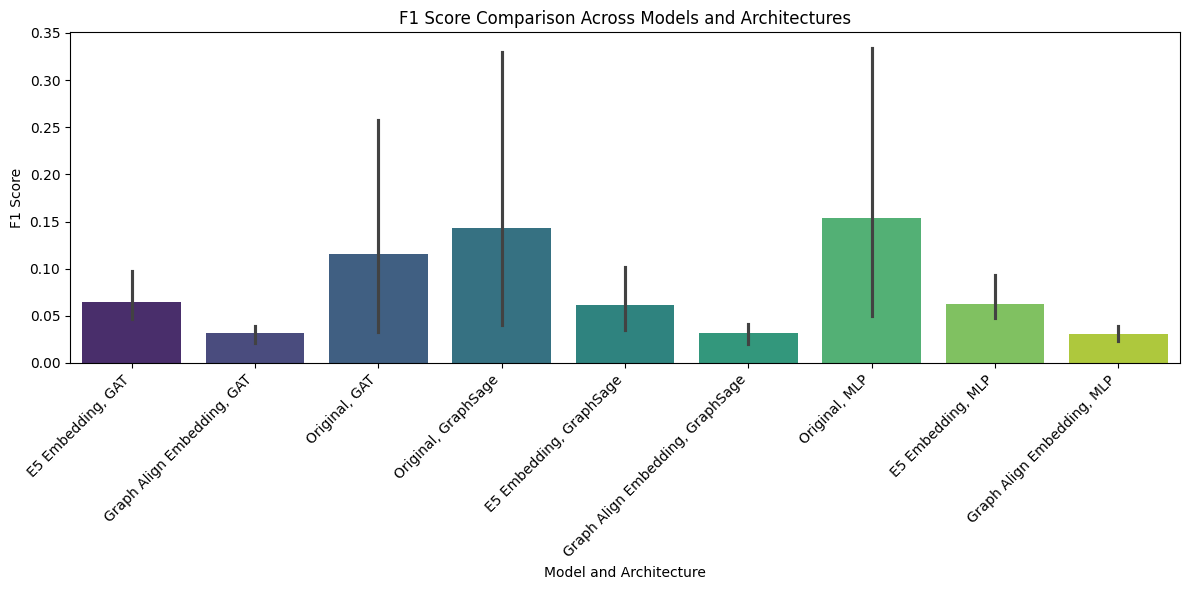

In [10]:
# Create a new column combining 'Embedding Model' and 'Network Architecture'
df['Model_Architecture'] = df['Feature'] + ', ' + df['Model']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Model_Architecture', y='Test_F1', palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('F1 Score Comparison Across Models and Architectures')
plt.xlabel('Model and Architecture')
plt.ylabel('F1 Score')
plt.tight_layout()

# Show the plot
plt.show()

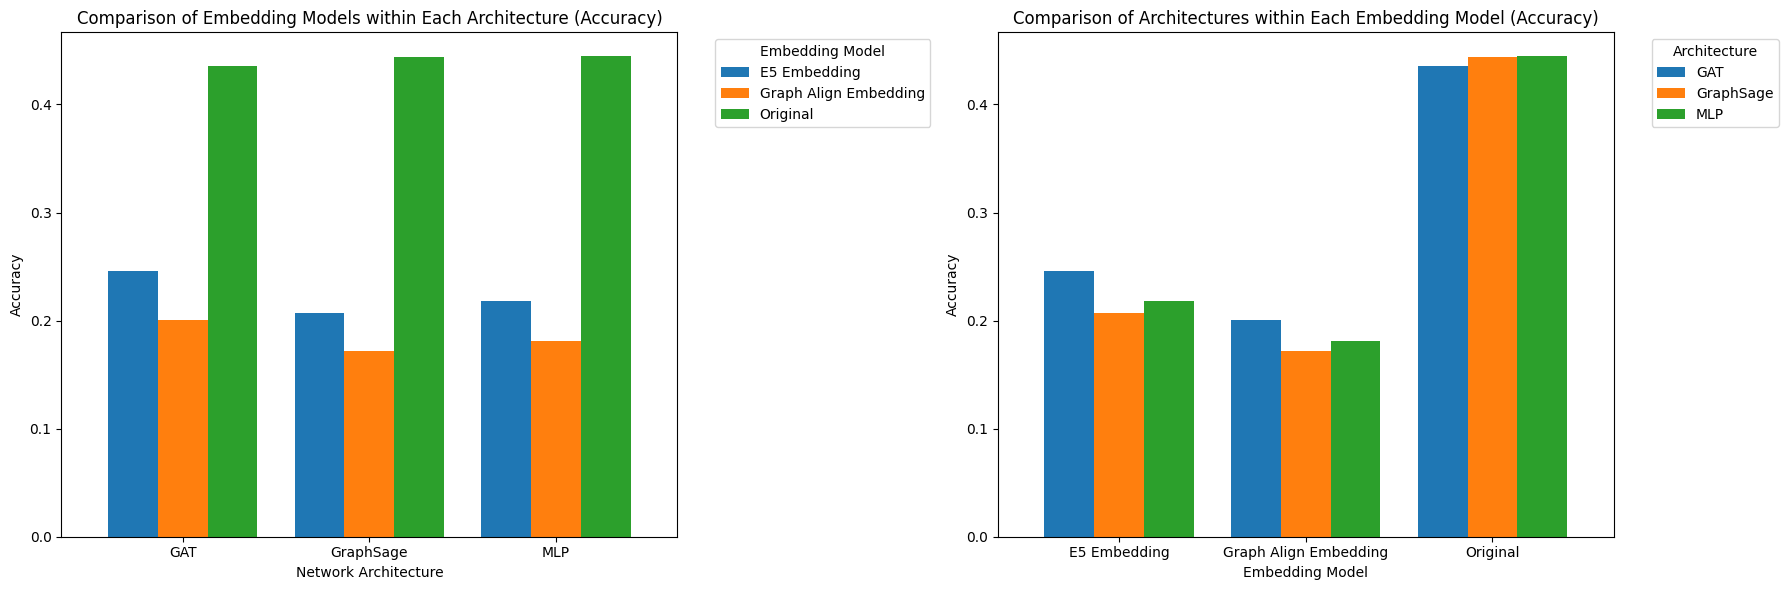

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Model', columns='Feature', values='Test_F1')

# Plot the first grouped bar chart
pivot_data.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Comparison of Embedding Models within Each Architecture (Accuracy)')
axes[0].set_xlabel('Network Architecture')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Embedding Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Pivot the data for the second grouped bar chart
pivot_data_architecture = grouped_data.pivot(index='Feature', columns='Model', values='Test_Accuracy')

# Plot the second grouped bar chart
pivot_data_architecture.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Comparison of Architectures within Each Embedding Model (Accuracy)')
axes[1].set_xlabel('Embedding Model')
axes[1].set_ylabel('Accuracy')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Architecture', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


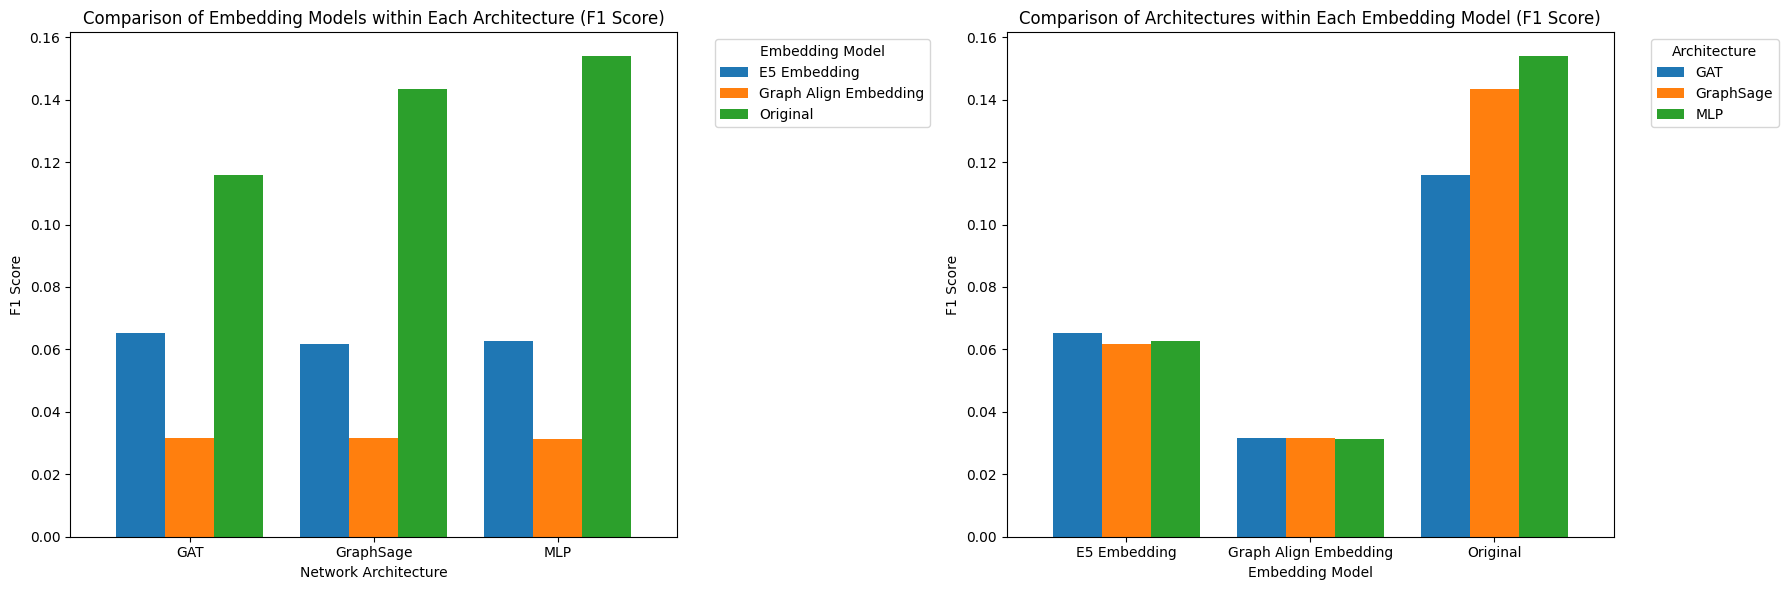

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Model', columns='Feature', values='Test_F1')

# Plot the first grouped bar chart
pivot_data.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Comparison of Embedding Models within Each Architecture (F1 Score)')
axes[0].set_xlabel('Network Architecture')
axes[0].set_ylabel('F1 Score')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Embedding Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Pivot the data for the second grouped bar chart
pivot_data_architecture = grouped_data.pivot(index='Feature', columns='Model', values='Test_F1')

# Plot the second grouped bar chart
pivot_data_architecture.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Comparison of Architectures within Each Embedding Model (F1 Score)')
axes[1].set_xlabel('Embedding Model')
axes[1].set_ylabel('F1 Score')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Architecture', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


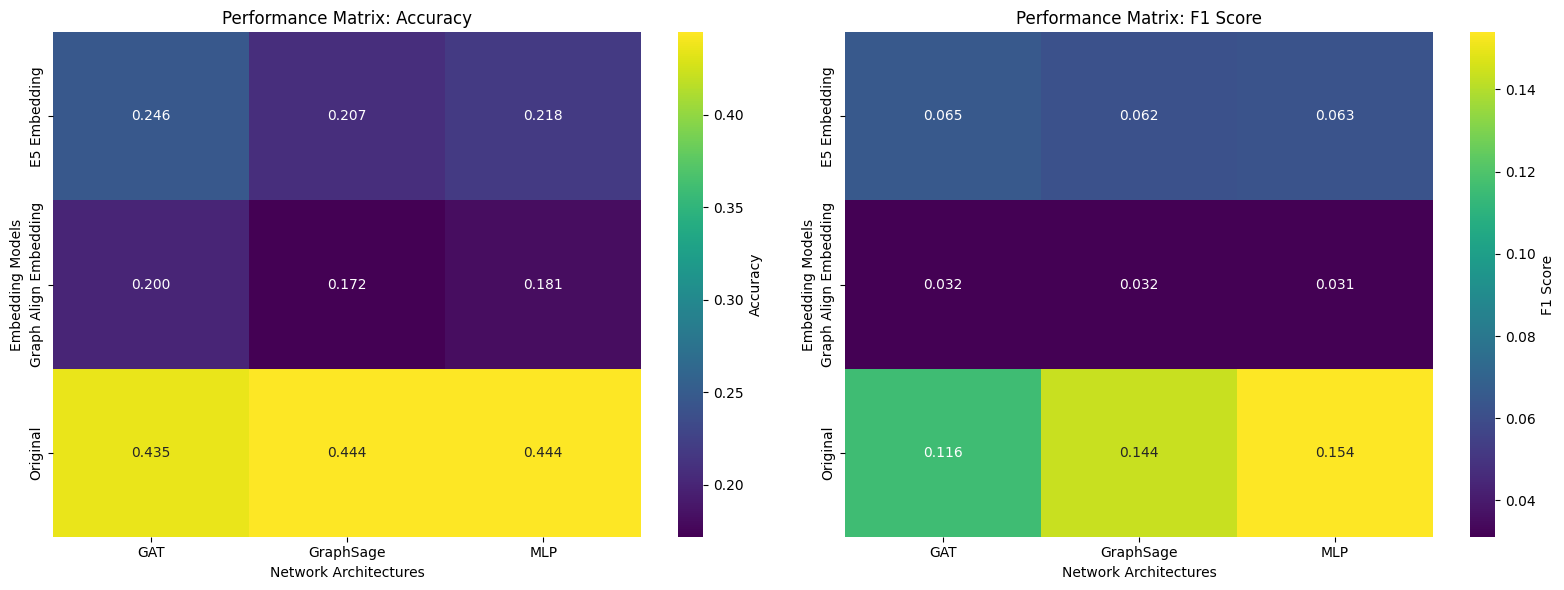

In [19]:
# Create subplots for side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Prepare the data for the F1 score heatmap
heatmap_data_f1 = grouped_data.pivot(index='Feature', columns='Model', values='Test_F1')

# Plot the F1 score heatmap on the right
sns.heatmap(heatmap_data_f1, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'F1 Score'}, ax=axes[1])
axes[1].set_title('Performance Matrix: F1 Score')
axes[1].set_xlabel('Network Architectures')
axes[1].set_ylabel('Embedding Models')

# Prepare the data for the accuracy heatmap
heatmap_data_accuracy = grouped_data.pivot(index='Feature', columns='Model', values='Test_Accuracy')

# Plot the accuracy heatmap on the left
sns.heatmap(heatmap_data_accuracy, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Accuracy'}, ax=axes[0])
axes[0].set_title('Performance Matrix: Accuracy')
axes[0].set_xlabel('Network Architectures')
axes[0].set_ylabel('Embedding Models')

# Adjust layout
plt.tight_layout()

# Show the heatmaps
plt.show()

In [24]:
# Display the table with Test Accuracy and Test F1 Score
result_table = df[['Model', 'Feature', 'Graph', 'Test_Accuracy', 'Test_F1']]
result_table


,Model,Feature,Graph,Test_Accuracy,Test_F1
0,GAT,E5 Embedding,Arxiv,0.142810,0.097471
1,GAT,Graph Align Embedding,Arxiv,0.082999,0.021572
2,GAT,Original,Arxiv,0.504825,0.257379
3,GAT,E5 Embedding,MAG,0.374564,0.051038
4,GAT,Graph Align Embedding,MAG,0.338972,0.039555
5,GAT,Original,MAG,0.365898,0.033168
6,GAT,E5 Embedding,Joined,0.221474,0.046885
7,GAT,Graph Align Embedding,Joined,0.179383,0.033860
8,GAT,Original,Joined,0.434985,0.057304
9,GraphSage,Original,Joined,0.447700,0.060100


In [34]:
# Create a pivot table grouped by Model with Graph in columns
pivot_by_model_graph = df.pivot_table(index=('Model','Graph'), values=['Test_Accuracy', 'Test_F1'])

# The pivot_table already has a multi-index with Model and Graph

print(pivot_by_model_graph)

                  Test_Accuracy   Test_F1
Model     Graph                          
GAT       Arxiv        0.243545  0.125474
          Joined       0.278614  0.046016
          MAG          0.359812  0.041254
GraphSage Arxiv        0.258733  0.150833
          Joined       0.253433  0.045533
          MAG          0.311100  0.040333
MLP       Arxiv        0.252207  0.150080
          Joined       0.266703  0.051896
          MAG          0.324124  0.045628
